# Decision Trees

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True) #Drop irrelevant columns

In [5]:
# Filling missing values in the 'Age' column with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [6]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [9]:
# Separate independent variables (X) and dependent variable (y)
X = titanic_df.drop(columns=["Survived"])
y = titanic_df["Survived"]

In [10]:
# Split the data into training (60%), development (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Development set shape:", X_dev.shape, y_dev.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (534, 10) (534,)
Development set shape: (178, 10) (178,)
Test set shape: (179, 10) (179,)


In [12]:
# Store accuracies
training_accuracies = []
development_accuracies = []

In [13]:
# training a model without pruning
unpruned = DecisionTreeClassifier(random_state=42)
unpruned.fit(X_train, y_train)
unpruned_accuracy = unpruned.score(X_test, y_test)
print("Performance without pruning:", unpruned_accuracy)
print("Max depth without pruning:", unpruned.tree_.max_depth)

Performance without pruning: 0.776536312849162
Max depth without pruning: 17


In [14]:
# Evaluate the effect of pruning
pruned_depths = range(1, unpruned.tree_.max_depth + 1)
pruned_scores = []

for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pruned_scores.append(score)

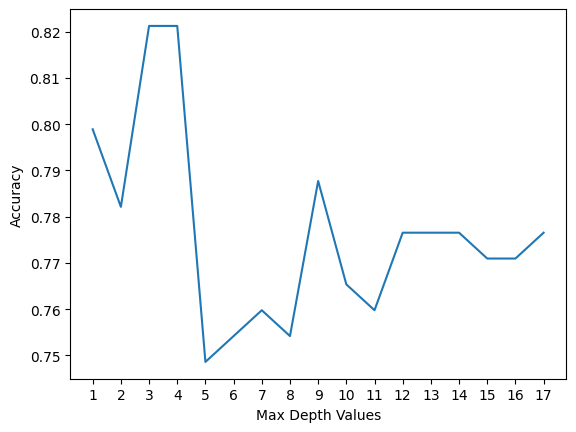

In [15]:
# Plot the pruning results
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max Depth Values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

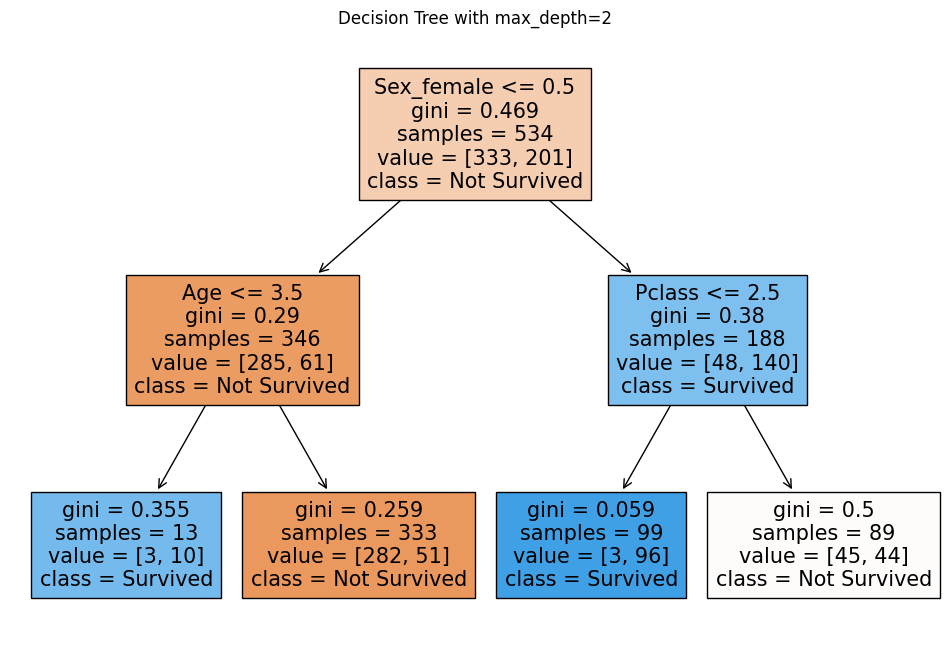

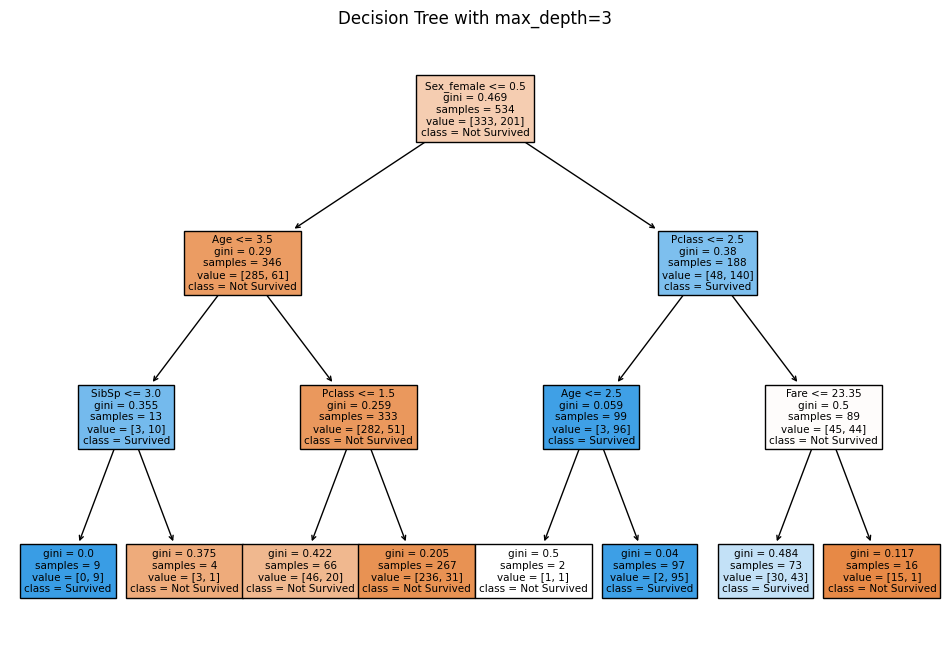

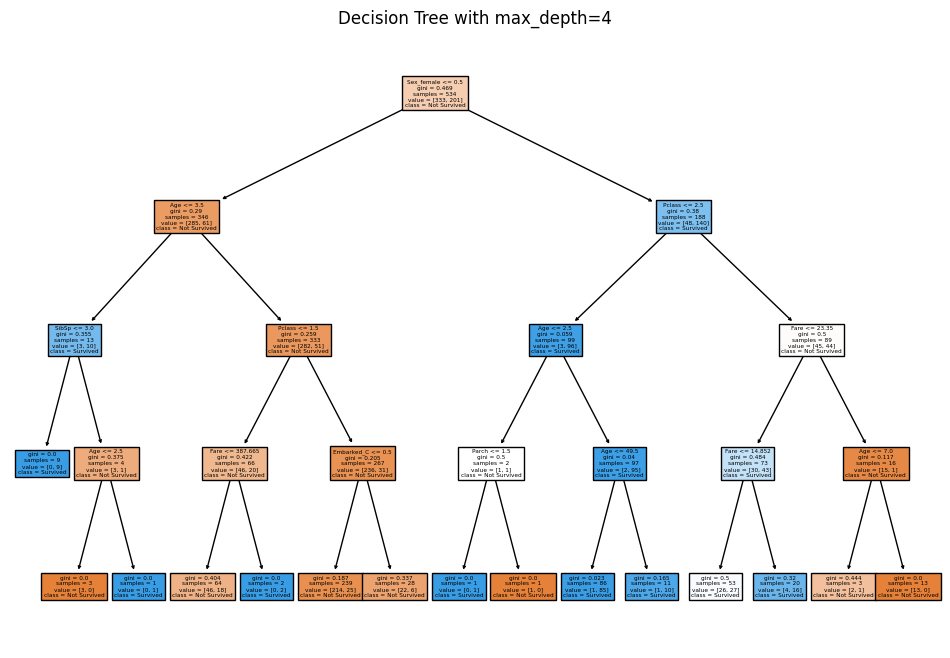

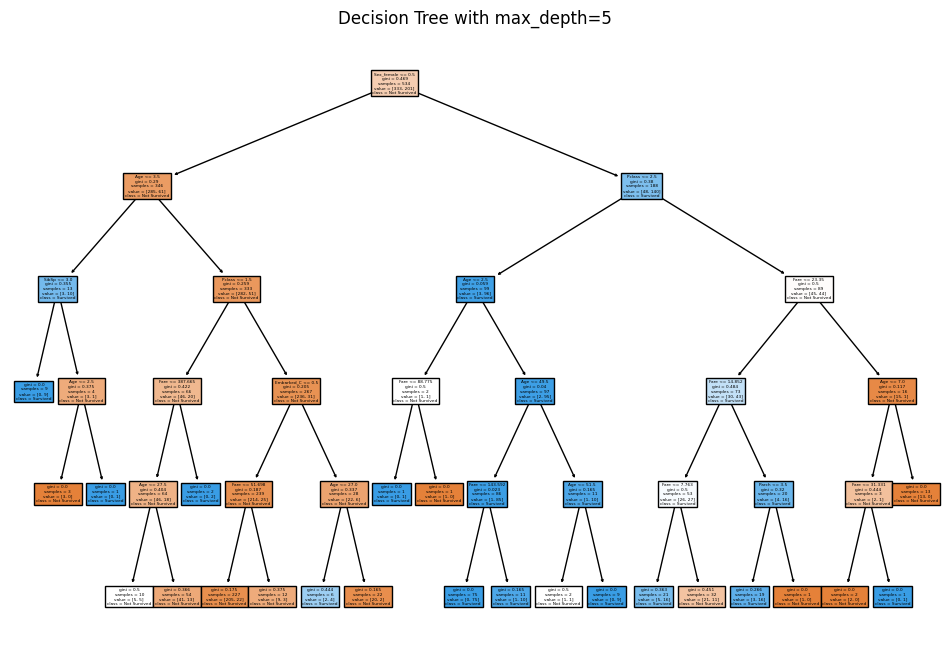

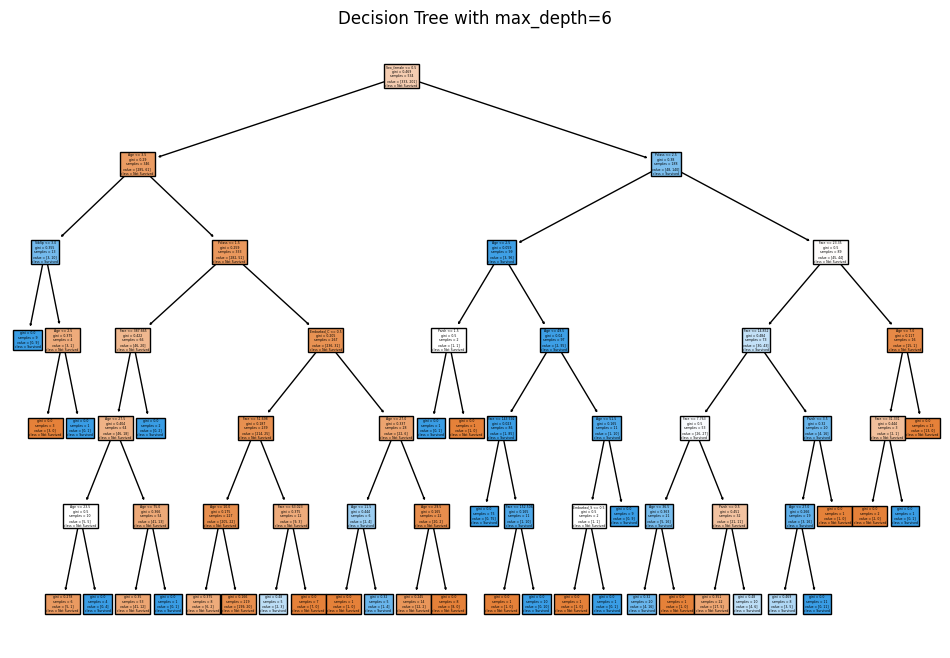

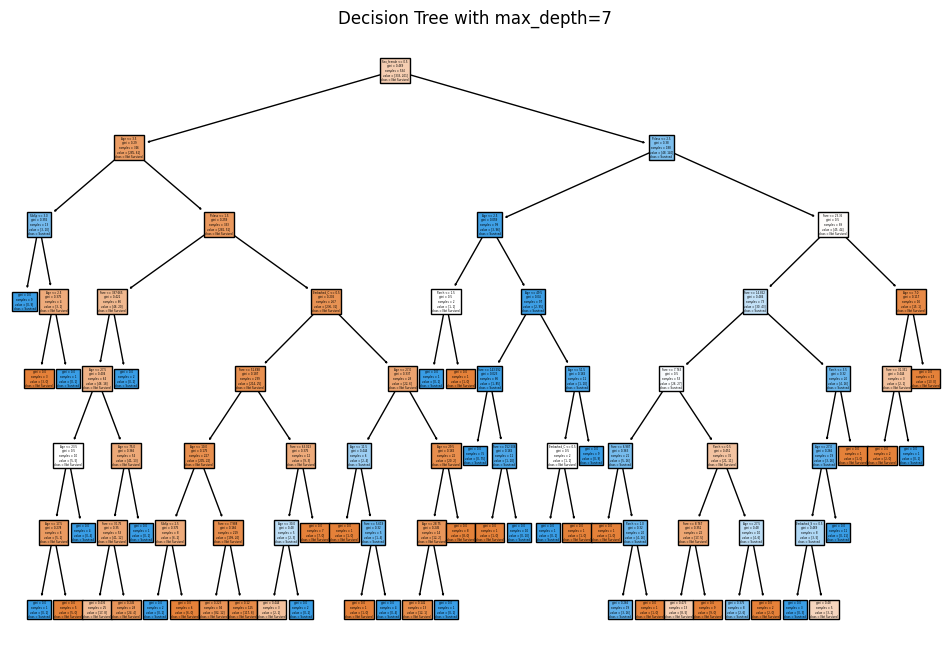

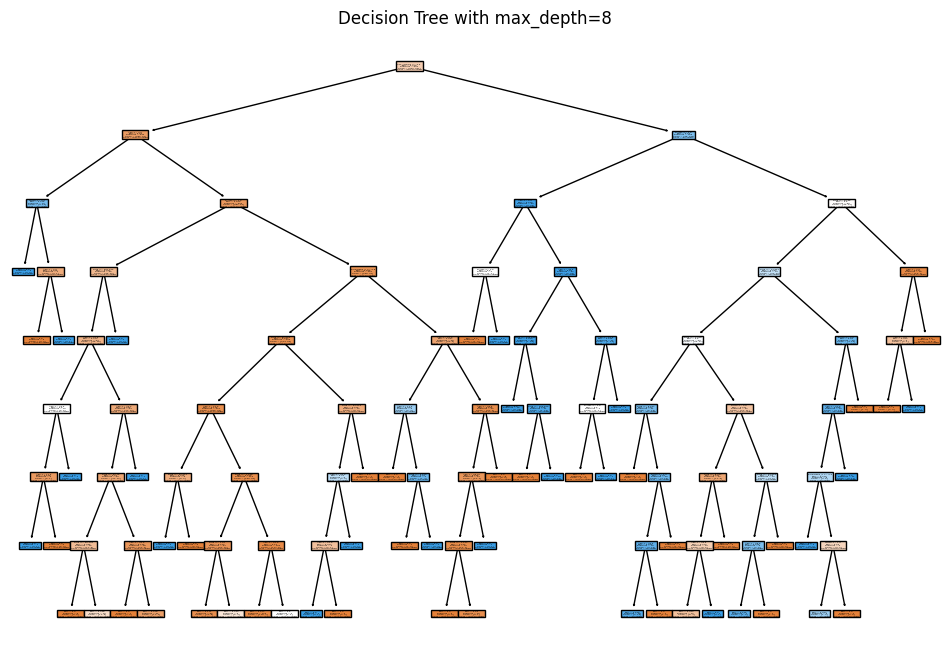

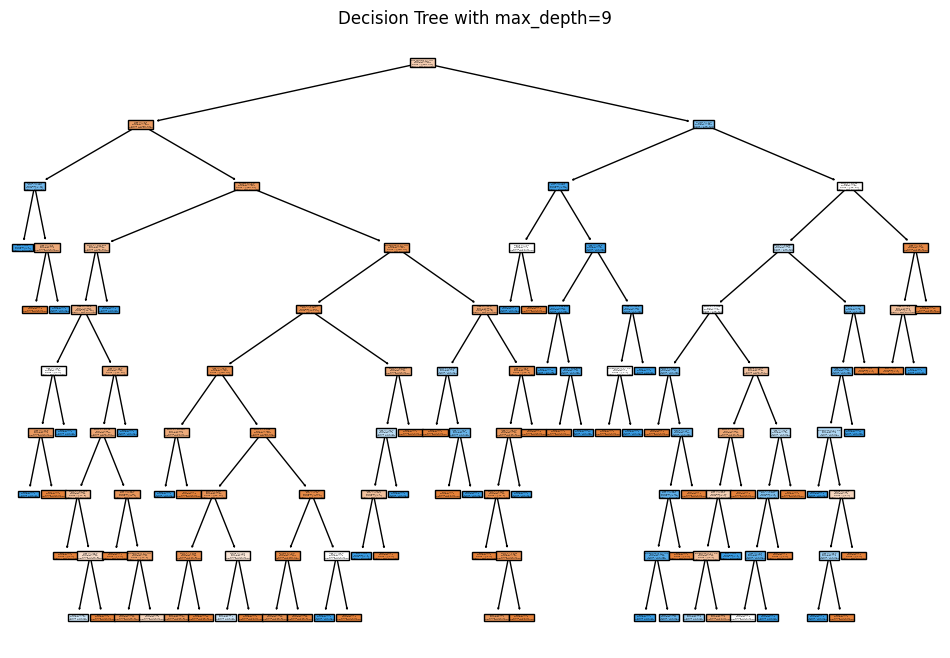

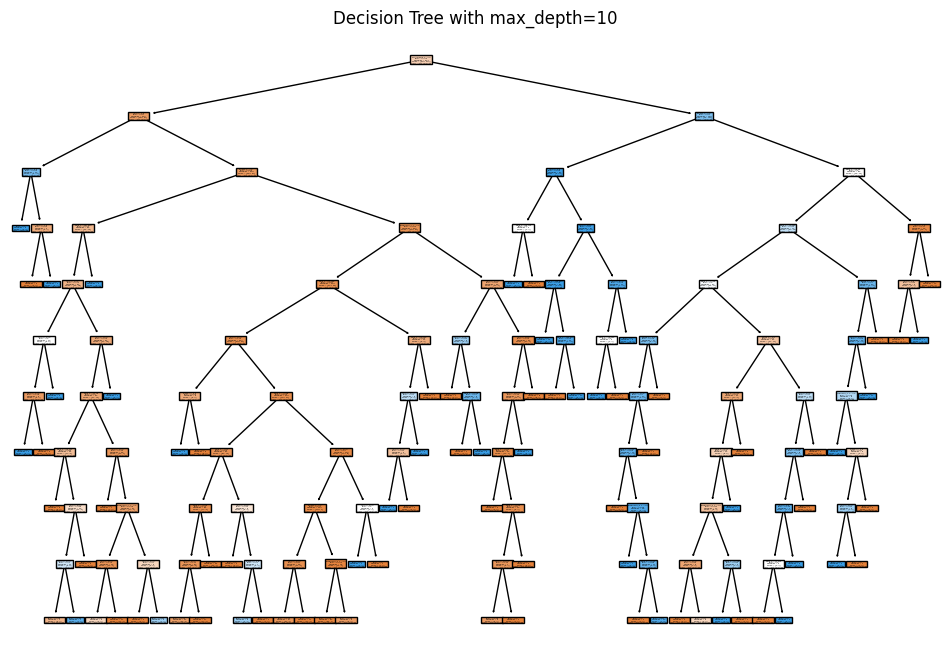

In [16]:
# Train the model with different max_depth values and plot the decision tree
training_accuracies = []
development_accuracies = []

for max_depth in range(2, 11):
    # Train the decision tree
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Compute accuracy on the training and development sets
    y_train_pred = model.predict(X_train)
    y_dev_pred = model.predict(X_dev)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)

    training_accuracies.append(train_accuracy)
    development_accuracies.append(dev_accuracy)

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
    plt.title(f"Decision Tree with max_depth={max_depth}")
    plt.show()

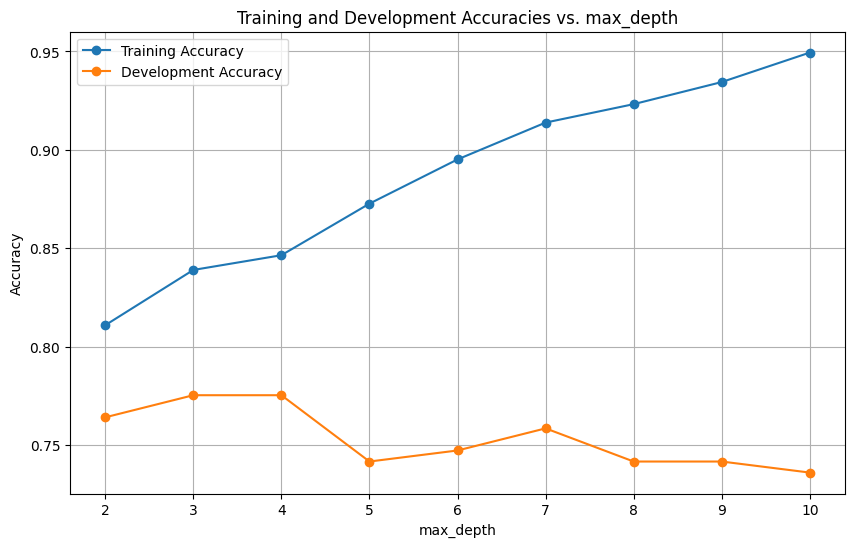

In [17]:
# Plot the training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), training_accuracies, marker='o', label='Training Accuracy')
plt.plot(range(2, 11), development_accuracies, marker='o', label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs. max_depth')
plt.legend()
plt.grid(True)
plt.show()

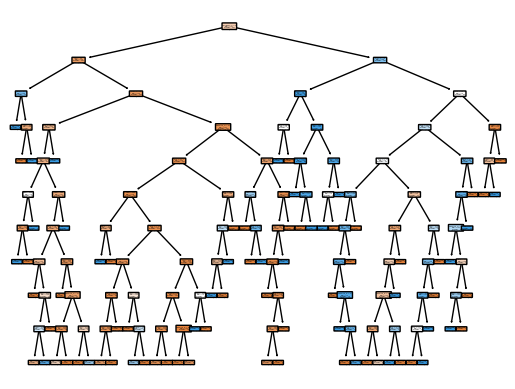

In [18]:
# Graphviz export
graphviz_installed = False

if graphviz_installed:
    export_graphviz(model, out_file='pruned_tree.dot', feature_names=X.columns,
                    rounded=True, proportion=False, precision=2, filled=True)
    call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=600'])
else:
    fig = plt.figure()
    plot_tree(model, feature_names=X.columns, rounded=True, proportion=False, precision=2, filled=True)
    fig.savefig('pruned_tree.png')

#Image(filename = 'pruned_tree.png', width=400)

# Random Forests

In [19]:
# importing packages
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
# Training and evaluating Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_train_accuracy = accuracy_score(y_train, bagging_model.predict(X_train))
bagging_dev_accuracy = accuracy_score(y_dev, bagging_model.predict(X_dev))
print("Bagging Classifier - Training Accuracy:", bagging_train_accuracy)
print("Bagging Classifier - Development Accuracy:", bagging_dev_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier - Training Accuracy: 0.9831460674157303
Bagging Classifier - Development Accuracy: 0.7528089887640449


In [21]:
# Training and evaluating Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
rf_dev_accuracy = accuracy_score(y_dev, rf_model.predict(X_dev))
print("Random Forest Classifier - Training Accuracy:", rf_train_accuracy)
print("Random Forest Classifier - Development Accuracy:", rf_dev_accuracy)

Random Forest Classifier - Training Accuracy: 0.9831460674157303
Random Forest Classifier - Development Accuracy: 0.7584269662921348


In [22]:
# Determining feature importance from Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Fare          0.244928
Age           0.234451
Sex_male      0.172494
Sex_female    0.133988
Pclass        0.086075
SibSp         0.046770
Parch         0.039545
Embarked_C    0.016151
Embarked_S    0.016068
Embarked_Q    0.009530
dtype: float64


In [23]:
# Training and evaluating AdaBoost Classifier
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_train_accuracy = accuracy_score(y_train, boosting_model.predict(X_train))
boosting_dev_accuracy = accuracy_score(y_dev, boosting_model.predict(X_dev))
print("AdaBoost Classifier - Training Accuracy:", boosting_train_accuracy)
print("AdaBoost Classifier - Development Accuracy:", boosting_dev_accuracy)

AdaBoost Classifier - Training Accuracy: 0.8726591760299626
AdaBoost Classifier - Development Accuracy: 0.7921348314606742


In [24]:
# Tune parameters for the Random Forest model
n_estimators_range = [50, 100, 150, 200]
max_depth_range = [5, 10, 15, 20]
best_score = 0
best_params = {}

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_tuned_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_tuned_model.fit(X_train, y_train)
        dev_accuracy = accuracy_score(y_dev, rf_tuned_model.predict(X_dev))

        if dev_accuracy > best_score:
            best_score = dev_accuracy
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

print("Best parameters for Random Forest:", best_params)
print("Best development set accuracy:", best_score)

Best parameters for Random Forest: {'n_estimators': 150, 'max_depth': 5}
Best development set accuracy: 0.8146067415730337


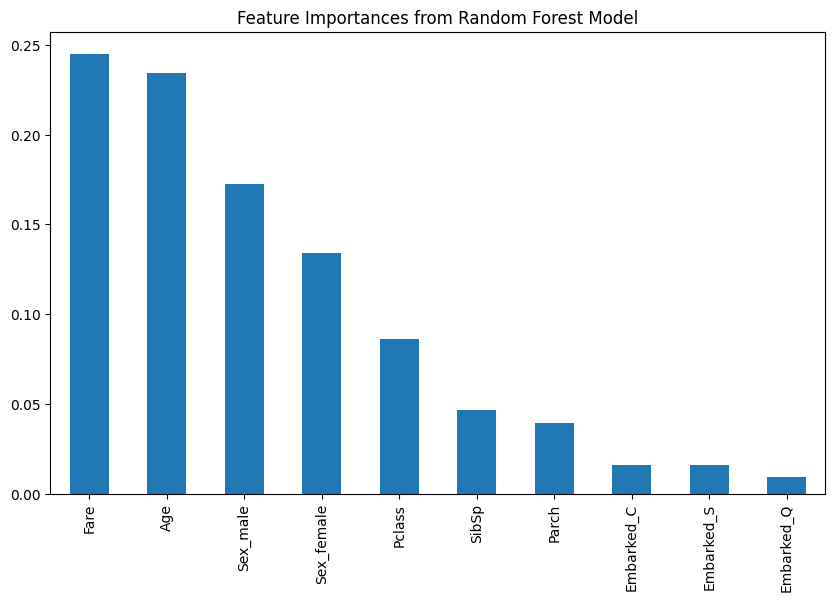

In [25]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest Model')
plt.show()

In [26]:
# Report
# The Random Forest Classifier performed the best among the models evaluated, with a development set accuracy of 0.8146.
# The optimal parameters for this model were found to be n_estimators = 150 and max_depth = 5.

#Model Accuracies:

##Bagging Classifier:
#####Training Accuracy: 0.9831
#####Development Accuracy: 0.7528

##Random Forest Classifier:
#####Training Accuracy: 0.9831
#####Development Accuracy: 0.7584

##AdaBoost Classifier:
#####Training Accuracy: 0.8727
#####Development Accuracy: 0.7921